# Plot generation
### Plots for the LSTM_HC with my classsifiers

In [1]:
from scorers import scorer
import seaborn as sns
import pandas as pd
import pickle
from matplotlib import pyplot as plt
from gym_PGFS.scorers.scorer import GuacamolMGenFailScorer
from gym_PGFS.valuation.plot_utils import plot_medians, process_output_into_dataframe

In [3]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/PycharmProjects/gym-PGFS-bias'

In [3]:
dsets = ['CHEMBL3888429', 'CHEMBL1909140', 'CHEMBL1909203']

In [4]:
outcomes = {}

for dset in dsets:
    with open(f"./data/lstm_hc/list_result_{dset}.pkl", "rb") as f:
        outcomes[dset] = pickle.load(f)
        print(len(outcomes[dset]))

151
151
151


In [6]:
# iterate over the lists, convert them to dataframes
outcome_dfs = {}
for name, dset in outcomes.items():
    
    scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                                     fingerprints_used='ECFP_2_1024',
                                     name=name)

    outcome_dfs[name] = process_output_into_dataframe(dset, scoring)
    
    # save the resulting dataframe to csv
    outcome_dfs[name].to_csv(f"./data/lstm_hc/{name}_outcome.csv")
    
    # basic sanity check
    print(len(outcome_dfs[name]))

# keep the memory clean
del(outcomes)

151it [01:25,  1.77it/s]
0it [00:00, ?it/s]

275721


151it [01:38,  1.53it/s]
0it [00:00, ?it/s]

256593


151it [01:59,  1.27it/s]


261615


In [4]:
# use this block to skip preprocessing

outcome_dfs = {}

for name in dsets:
    outcome_dfs[name] = pd.read_csv(f"./data/lstm_hc/{name}_outcome.csv")

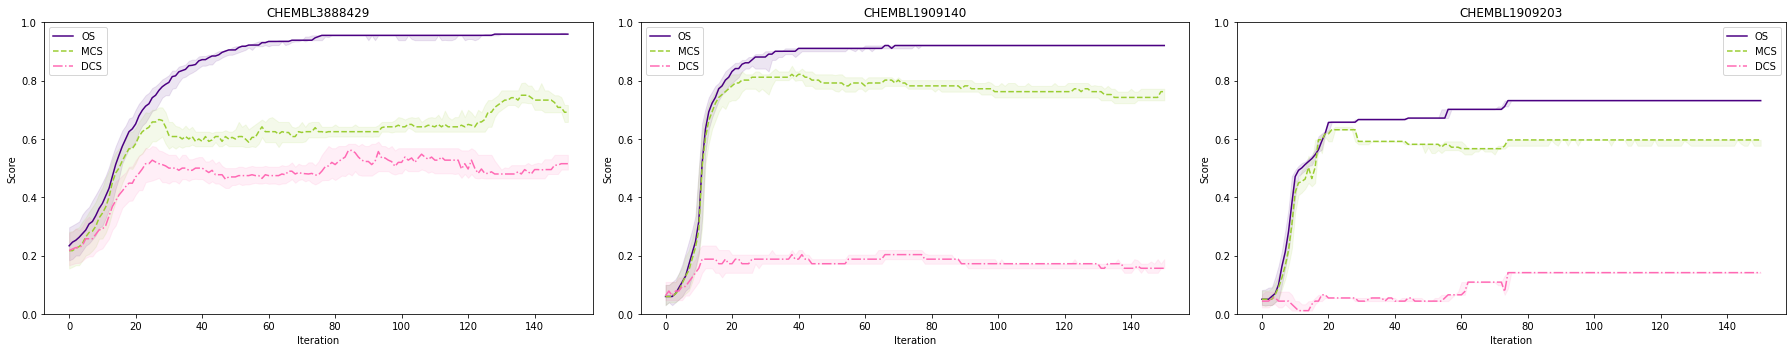

In [5]:
# make a plot
fig, axs = plt.subplots(1,3,figsize=(25,5))

for (name, data), (i, ax) in zip(outcome_dfs.items(), enumerate(axs)):
    plot_medians(data, 
                 ax,
                 (0, i),
                 name,
                 'Score',
                 'Iteration',
                 y_scale = (0.,1.),
                 x_scale = None
                )
plt.tight_layout()

### Similar line plots for the outcomes of the PGFS model.

In [37]:
from scorers import scorer
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from gym_PGFS.scorers.scorer import GuacamolMGenFailScorer
from gym_PGFS.valuation.plot_utils import plot_medians, process_PGFS_output_into_dataset

In [2]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/chemPGFS/gymPGFS'

In [3]:
run_dirs = {'./data/run_B': 'CHEMBL3888429', 
            './data/run_A': 'CHEMBL1909140', 
            './data/run_C': 'CHEMBL1909203'}

In [ ]:
outcomes = {}

for location, name in run_dirs.items():
    # load the pickle
    with open(f"{location}/smiles_collected.pkl", "rb") as f:
        outcomes[name] = pickle.load(f)
        print(len(outcomes[name]))
    
    # fire up the scorer
    scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                                 fingerprints_used='ECFP_2_1024',
                                 name=name)

    # convert into dataframe
    outcomes[name] = process_PGFS_output_into_dataset(outcomes[name], scoring)
        
    # save the dataframe as csv for future use
    outcomes[name].to_csv(f"{location}/smiles_collected.csv")
    
    print(len(outcomes[name]))

In [4]:
# use this block to skip preprocessing

outcomes = {}

for location, name in run_dirs.items():
    df = pd.read_csv(f"{location}/smiles_collected.csv")
    print(len(df))
    print(df['step'].unique()) 
    print("Picking 5")
    df = df[df['step']==5].reset_index().drop('index', 1)[['epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])
    outcomes[name] = df

    

37800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5


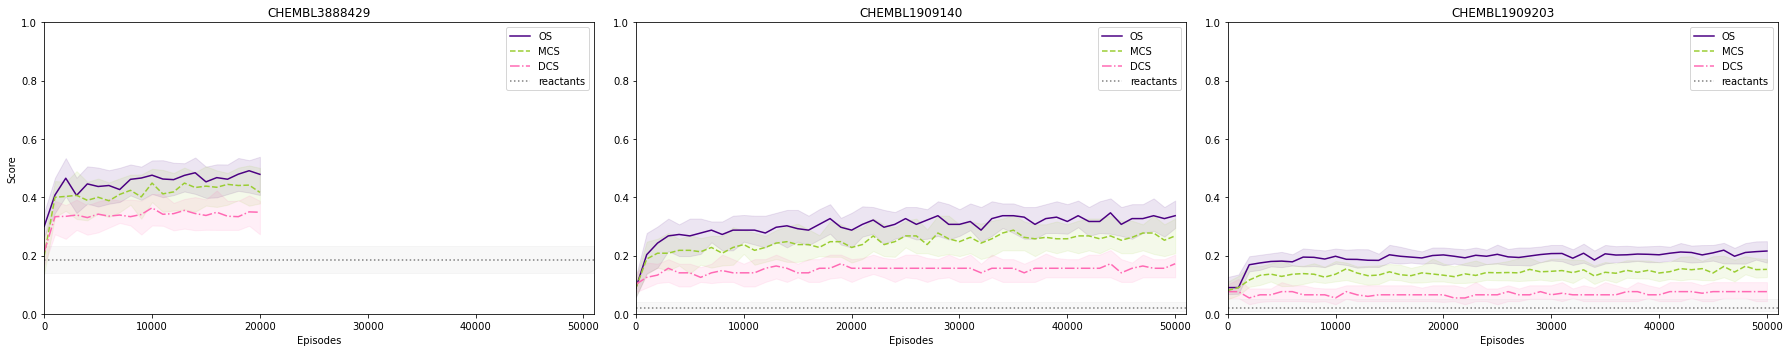

In [15]:
# make a plot
fig, axs = plt.subplots(1,3,figsize=(25,5))

for (name, data), (i, ax) in zip(outcomes.items(), enumerate(axs)):
    plot_medians(data, 
                 ax,
                 (0, i),
                 name,
                 'Score',
                 'Episodes',
                 y_scale = (0.,1.),
                 x_scale = (0.,  51000.)
                )
    
    # load the scorer once more
    scoring = GuacamolMGenFailScorer(mgenfail_data_prefix='./data/mgenfail_assays',
                             fingerprints_used='ECFP_2_1024',
                             name=name)
    # load the reactants set
    with open('./data/run_A/preprocessed/reactants_processed.pkl', 'rb') as f:
        reactants = pickle.load(f)
    raw_scores = scoring.raw_score_list(reactants['smiles'].tolist())
    scores = np.array(raw_scores)
    quants = np.quantile(scores, [0.25, 0.5, 0.75])
    x_ticks = ax.get_xticks()
    bot = [quants[0] for _ in x_ticks]
    med = [quants[1] for _ in x_ticks]
    top = [quants[2] for _ in x_ticks]
    # plot the median an quantiles of the reactant set
    ax.plot(x_ticks, med, ':', color='grey', label='reactants')
    ax.fill_between(x_ticks, bot, top, alpha=0.1, color='silver')    
    ax.legend()
    
plt.tight_layout()

In [16]:
with open('./data/run_A/preprocessed/reactants_processed.pkl', 'rb') as f:
    reactants = pickle.load(f)
reactants

,smiles,n_heavy,react_0_0,react_1_0,react_1_1,react_2_0,react_2_1,react_3_0,react_3_1,react_4_0,...,react_59_0,react_60_0,react_61_0,react_62_0,ECFP_2_1024,ECFP_2_512,ECFP_2_256,ECFP_2_128,MolD,n_templates
0,C[Si](C)(C)C#Cc1cc(Br)cnc1O,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[9.41278376165281, -1.395623425296044, 0.00097...",10
1,FC(F)(F)c1ccc(C#CCBr)cc1,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, ...","[12.12805894116906, -4.276407194822373, 0.5079...",7
2,CC(C)[Si](C#CBr)(C(C)C)C(C)C,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.5, -1.435570987654321, 0.7338425925925924, ...",7
3,CC(C)C(Br)C(=O)C#C[Si](C)(C)C,13,False,False,False,False,False,False,False,False,...,True,True,False,False,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ...","[11.432893518518519, -1.403403722600151, 0.011...",11
4,CC[Si](C#CC1(Br)CC1)(CC)CC,13,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[3.678487811791383, -1.1783024691358024, 0.240...",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92404,OCCS,4,False,False,False,False,False,False,False,False,...,False,False,False,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[7.798611111111111, 0.183641975308642, 0.18364...",8
92405,CC(=O)S,4,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[9.308641975308642, -0.13888888888888862, 0.13...",2
92406,NCCS,4,False,False,False,False,False,False,False,False,...,False,False,False,True,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[4.951388888888889, 0.683641975308642, 0.68364...",8
92407,O=Cc1ccc(C(=O)O)c([N+](=O)[O-])c1,14,False,False,False,False,False,False,False,False,...,False,False,False,False,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[10.53305933484505, -1.394306500377929, 0.0710...",11


In [18]:
smi = reactants['smiles'].iloc[0:20]
smi

0       C[Si](C)(C)C#Cc1cc(Br)cnc1O
1          FC(F)(F)c1ccc(C#CCBr)cc1
2      CC(C)[Si](C#CBr)(C(C)C)C(C)C
3     CC(C)C(Br)C(=O)C#C[Si](C)(C)C
4        CC[Si](C#CC1(Br)CC1)(CC)CC
5                  OCc1ccc(C#CI)cc1
6                    C#CCOc1ccccc1I
7                  C#CCOc1ccc(I)cc1
8                  C#CCOc1cccc(I)c1
9        C[Si](C)(C)C#Cc1ccc(Br)cn1
10           C#CCCCC(N)c1ccc(Br)cc1
11                 C#CCCC1(CCI)N=N1
12      C#CC12CC3CC(CC(Br)(C3)C1)C2
13           COC(=O)C#Cc1cccc(Br)c1
14           COC(=O)C#Cc1ccc(Br)cc1
15           C#Cc1cccc(NC(=O)CBr)c1
16              C#CCCCCc1cccc(Br)c1
17            C#CCn1ccc2cc(Br)ccc21
18      CCCCC(O)(C#C[Si](C)(C)C)CCl
19           C#Cc1cc(F)c(Br)c(F)c1N
Name: smiles, dtype: object

In [19]:
smi_a = smi.sample(n=10)
smi_b = smi[~smi.isin(smi_a)]

In [21]:
smi_a


5                OCc1ccc(C#CI)cc1
1        FC(F)(F)c1ccc(C#CCBr)cc1
12    C#CC12CC3CC(CC(Br)(C3)C1)C2
13         COC(=O)C#Cc1cccc(Br)c1
19         C#Cc1cc(F)c(Br)c(F)c1N
14         COC(=O)C#Cc1ccc(Br)cc1
17          C#CCn1ccc2cc(Br)ccc21
7                C#CCOc1ccc(I)cc1
18    CCCCC(O)(C#C[Si](C)(C)C)CCl
11               C#CCCC1(CCI)N=N1
Name: smiles, dtype: object

### Consider the diversity of the outputs

In [58]:
import numpy as np
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem

from matplotlib import pyplot as plt

from gym_PGFS.chemwrapped import ChemMolFromSmilesWrapper, ECFP6_bitvector_numpy

In [2]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/PycharmProjects/gym-PGFS-bias'

In [31]:
run_dirs = {'./data/run_B': 'CHEMBL3888429', 
            # './data/run_A': 'CHEMBL1909140', 
            './data/run_C': 'CHEMBL1909203'}
dsets = ['CHEMBL3888429', 'CHEMBL1909140', 'CHEMBL1909203']

outcome_dfs = {}

for name in dsets:
    outcome_dfs[name] = pd.read_csv(f"./data/lstm_hc/{name}_outcome.csv")

In [43]:
def compute_tanimoto_similarity_matrix(mol_list):
    similarity_matrix = np.zeros((len(mol_list), len(mol_list)))
    # print(similarity_matrix.shape)
    mol_list = [AllChem.GetMorganFingerprintAsBitVect(ChemMolFromSmilesWrapper(mol), 2, nBits=1024) for mol in mol_list]
    for i in range(len(mol_list)):
        for j in range(i+1, len(mol_list)):
            similarity_matrix[i, j] = DataStructs.FingerprintSimilarity(mol_list[i],mol_list[j], metric=DataStructs.TanimotoSimilarity)
    return similarity_matrix

In [44]:
def tanimoto_similarity_score(mat):
    mat = mat - np.identity(len(mat))
    # adjusted by the total number of comparisons made, therfore has the range of 0 to 1
    return np.linalg.norm(mat, 2)/(len(mat)*(len(mat)-1)/2)

In [51]:
def in_group_similarity_scores_plot(df):
    retlist = []
    print(f"Available values: {df['epoch'].unique().tolist()}")
    for i in df['epoch'].unique().tolist():
        # for each epoch output compute the score
        lst = df[(df['epoch']==i)&(df['type']=='OS_MODE')].smiles.tolist()
        mat = compute_tanimoto_similarity_matrix(lst)
        val = tanimoto_similarity_score(mat)
        print(i, len(mat), val)
        retlist.append(val)
    return retlist

In [29]:
line = in_group_similarity_scores_plot(ddf)

0 0.0001607484861702229
1 0.00015751873521965983
2 0.0001604530669472277
3 0.00017570889893499188
4 0.00018135787304896005
5 0.00017993604701166835
6 0.0001816517121334672
7 0.00018592912945873227
8 0.0001880180419327542
9 0.0001975141574298221
10 0.00020071110003481622
11 0.0002122550586660877
12 0.0002365974607980437
13 0.00027861207534193687
14 0.00031631097106514766
15 0.0003526177767442402
16 0.0004323979834552285
17 0.0004528559626095922
18 0.0004762620424252709
19 0.00048053197054449516
20 0.0004999269872573935
21 0.0005546081886825382
22 0.0005714491197254608
23 0.000623645771939654
24 0.0006459296590147282
25 0.0006917096253533739
26 0.0006973157812685155
27 0.0007753099105197338
28 0.0007529265114099236
29 0.0006918619395316971
30 0.000714906978659092
31 0.0007921319132181345
32 0.0008111182871625779
33 0.000898957685353791
34 0.0008869102044703781
35 0.0008085770836442419
36 0.0008550925142446104
37 0.0008396491069286707
38 0.0007716088758037557
39 0.000876906912284471
40 0.

In [30]:
# mat = compute_tanimoto_diversity_matrix(['CCO','CCCCC', 'CCc1ccccc1'])
# print(mat)
# tanimoto_diversity_score(mat)

# ddf = outcome_dfs[dsets[0]]
# lst = ddf[ddf['epoch']==150].smiles.unique().tolist()

# mat = compute_tanimoto_diversity_matrix(lst)

# tanimoto_diversity_score(mat)

In [53]:
# now do the same for an output of pgfs


pgfs_out = {}

for location, name in run_dirs.items():
    df = pd.read_csv(f"{location}/smiles_collected.csv")
    print(len(df))
    print(df['step'].unique()) 
    print("Picking 5")
    df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])
    pgfs_out[name] = df

    

37800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5


/tmp/ipykernel_68617/969013175.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])


In [56]:
pgfs_df = list(pgfs_out.values())[1]
pgfs_df

,smiles,epoch,type,value
8315,C#CCN(C)CC=CC(=O)Oc1cc(C(=O)OCC(NS(=O)(=O)Cc2c...,0,DCS_MODE,0.097826
8210,COc1cc(CC(C(=O)C=CC(NC(=O)c2ccc(F)c([N+](=O)[O...,0,DCS_MODE,0.108696
8213,CC(C(=O)OC(=O)c1cc(Oc2cc(C(F)(F)F)cc([N+](=O)[...,0,DCS_MODE,0.054348
8216,CSC(C#CCNc1ccc(C(F)(F)F)cc1)C(=O)C(Br)C(F)(F)C...,0,DCS_MODE,0.032609
8219,COC(=O)c1cc(C#N)cc(NC(c2ccc(F)c([N+](=O)[O-])c...,0,DCS_MODE,0.108696
...,...,...,...,...
10075,CCCCCCCC(=O)C(CCC)CCCC(=O)C(CCC)(CCC(C)n1nc(C)...,50000,MCS_MODE,0.125833
10047,CCCCCCC(Cl)C(=O)C1CCc2c(c3c(n2C(C)(Br)C(=O)Br)...,50000,OS_MODE,0.175833
10072,C=CC(Cc1cc(F)c(C(C)NS(=O)(=O)Cc2ccc(C(C)C)cc2)...,50000,MCS_MODE,0.135833
10115,CCCCCCC(Cl)C(=O)C(CC)(CCCCCCS(=O)(=O)NNCc1nc2c...,50000,DCS_MODE,0.130435


In [60]:
pgfs_line = in_group_similarity_scores_plot(pgfs_df)

Available values: [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000]
0 100 0.0029940830238849607
1000 100 0.001946980469834669
2000 100 0.0028054486474995708
3000 100 0.002473614183821582
4000 100 0.0026225489291837748
5000 100 0.002633331543874488
6000 100 0.00264663749177675
7000 100 0.0024447396244538224
8000 100 0.0024472114283261015
9000 100 0.0025264627790778484
10000 100 0.0024262191374745516
11000 100 0.0024451653959470026
12000 100 0.0025603461863891136
13000 100 0.0025115034846706625
14000 100 0.0024114339443004314
15000 100 0.002567372205233473
16000 100 0.002406514169131243
17000 100 0.0025417011387559706
18000 100 0.002581292281276086
19000 100 0.002514742746390927
20000 100 0.0025942

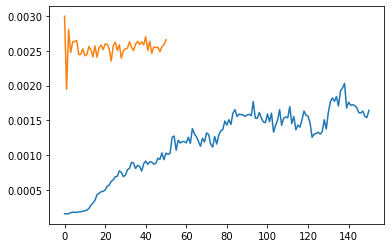

In [61]:
plt.plot(line)
plt.plot(pgfs_line)

## Estimate the number of of molecules accessible to the PGFS

In [63]:
from gym_PGFS.envs.PGFS_trials import gym_PGFS_basic_from_config
from gym_PGFS.valuation.comparison_vs_random import record_smiles_from_env
from gym_PGFS.config import load_config

In [64]:
# the environment configurations are roughly similar
config = "./gym_PGFS/configs/mgenfail_config_new_A.yaml"
root_dir = './data/run_A_new/'
conf = load_config(config)  # "./gym_PGFS/configs/config_server_default.yaml"
env = gym_PGFS_basic_from_config(root_dir, conf)  # './data'

Templates loaded from templates_processed.pkl
Reactions loaded from reactions_processed.pkl
Reactants loaded from reactants_processed.pkl
Loaded checkpoint.
ChemWorld <gym_PGFS.chemutils.ChemWorld object at 0x7f1de36a7340> has been deployed.
0           C#CCCI
1      O=C(O)C#CBr
2        C#CC(N)CO
3          CC#CCCO
4        C#CC(N)CC
          ...     
123       NCC(O)CO
124       NC(CO)CO
125    CC(N)C(N)=O
126      CC(O)=CCN
127      NC1CNC1=O
Name: smiles, Length: 128, dtype: object


In [65]:
set_of_smiles = {}
set_lengths = []

In [ ]:
for i in range(20):
    smis, errs = record_smiles_from_env(env, n_samples=100)
    smiles_last_step = [smi[-1] for smi in smis]
    set_of_smiles.update(smiles_last_step)
    newlen = len(set_of_smiles)
    print(i, newlen)
    set_lengths.append(newlen)

## Compare the dcs of the last step of LSTM_HC and PGFS models

In [1]:
import os
os.chdir('../')
os.getcwd()

'/home/boto/PycharmProjects/gym-PGFS-bias'

In [2]:
from scorers import scorer
import pandas as pd
import numpy as np
import pickle
from matplotlib import pyplot as plt
from gym_PGFS.scorers.scorer import GuacamolMGenFailScorer
from gym_PGFS.valuation.plot_utils import plot_medians, process_PGFS_output_into_dataset

In [3]:
run_dirs = {'./data/run_B': 'CHEMBL3888429', 
            './data/run_A': 'CHEMBL1909140', 
            './data/run_C': 'CHEMBL1909203'}
dsets = ['CHEMBL3888429', 'CHEMBL1909140', 'CHEMBL1909203']

lstm_out = {}

for name in dsets:
    lstm_out[name] = pd.read_csv(f"./data/lstm_hc/{name}_outcome.csv")
    
# now do the same for an output of pgfs


pgfs_out = {}

for location, name in run_dirs.items():
    df = pd.read_csv(f"{location}/smiles_collected.csv")
    print(len(df))
    print(df['step'].unique()) 
    print("Picking 5")
    df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])
    pgfs_out[name] = df

    

37800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5
91800
[0 1 2 3 4 5]
Picking 5


/tmp/ipykernel_74548/3196589372.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df[df['step']==5].reset_index().drop('index', 1)[['smiles', 'epoch', 'type', 'value']].sort_values(by=['type'], ascending=False).sort_values(by=['epoch'])


In [4]:
lstms = {}
pgfss = {}
for dataset_name in pgfs_out.keys():
    # get the lstm and pgfs datasets ( only dcs scores of the last epoch )
    lstm = lstm_out[dataset_name]
    last_lstm = lstm.epoch.max()
    lstm = lstm[(lstm['type']=='DCS_MODE')&(lstm['epoch']==last_lstm)]
    
    pgfs = pgfs_out[dataset_name]
    last_pgfs = pgfs.epoch.max()
    pgfs = pgfs[(pgfs['type']=='DCS_MODE')&(pgfs['epoch']==last_pgfs)]
    
    # now make a boxplot
    lstms[dataset_name] = lstm.value.to_numpy()
    pgfss[dataset_name] = pgfs.value.to_numpy()
    


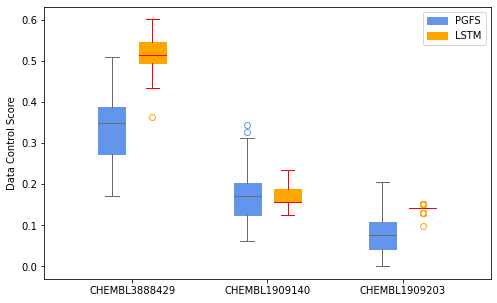

In [14]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()
plt.ylabel(f"Data Control Score")
# plt.xlabel("")

rng = np.arange(len(pgfs_out.keys()))
c, c_highlight = 'cornflowerblue', 'dimgrey'
pgfs_boxes = ax.boxplot(pgfss.values(), patch_artist=True, positions=rng-0.15, widths=0.2,
                            boxprops=dict(facecolor=c, color=c),
                            capprops=dict(color=c_highlight),
                            whiskerprops=dict(color=c_highlight),
                            flierprops=dict(color=c, markeredgecolor=c),
                            medianprops=dict(color=c_highlight))
c, c_highlight = 'orange', 'red'
lstm_boxes = ax.boxplot(lstms.values(), patch_artist=True, positions=rng+0.15, widths=0.2,
                            boxprops=dict(facecolor=c, color=c),
                            capprops=dict(color=c_highlight),
                            whiskerprops=dict(color=c_highlight),
                            flierprops=dict(color=c, markeredgecolor=c),
                            medianprops=dict(color=c_highlight))

ax.legend([pgfs_boxes["boxes"][0], lstm_boxes["boxes"][0]],
          ['PGFS', 'LSTM'],
          loc='upper right')

plt.xticks(rng, pgfss.keys())
plt.show()

## Evaluate the synthesizability score of outputs of both models (RAScore)